In [1]:
import tensorflow as tf

In [2]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [3]:
img_array = cv2.imread("C:/Users/Acer/Desktop/ML Projects/Mask/Face_Mask/00000_Mask.jpg")

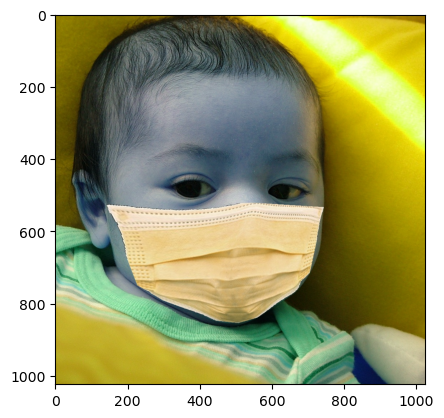

In [4]:
plt.imshow(img_array)

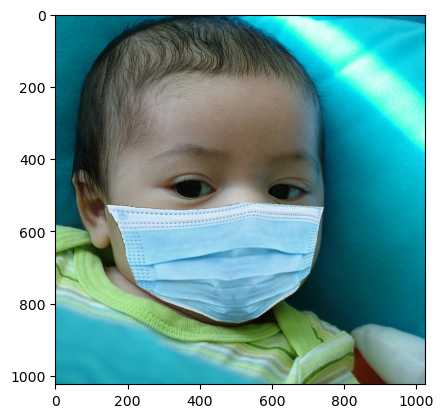

In [5]:
plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))

In [6]:
img_array.shape

(1024, 1024, 3)

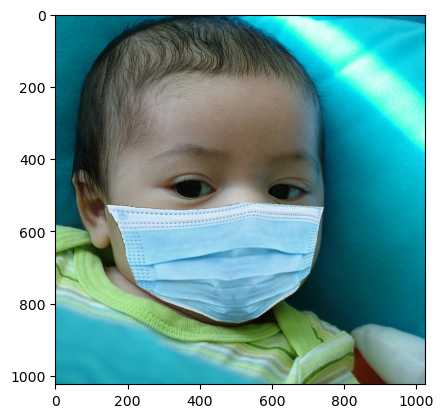

In [7]:
Datadirectory = "C:/Users/Acer/Desktop/ML Projects/Mask/"
Classes = ["Face_Mask","No_Mask"]
for category in Classes:
    path = os.path.join(Datadirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break    

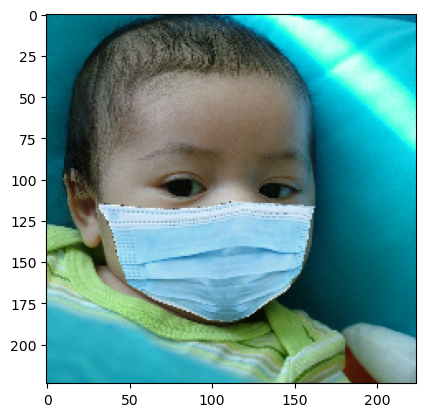

In [8]:
img_size= 224
new_array = cv2.resize(img_array, (img_size,img_size))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()

In [9]:
training_Data = []

def create_training_Data():
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array =  cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array, (img_size,img_size))
                training_Data.append([new_array,class_num])
            except Exception as e:
                pass

In [10]:
create_training_Data()

In [11]:
print(len(training_Data))

1950


In [12]:
import random
random.shuffle(training_Data)

In [13]:
X = []
y = []
for features,label in training_Data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, img_size, img_size, 3)    

In [14]:
X.shape

(1950, 224, 224, 3)

In [15]:
X = X/255.0

In [16]:
Y = np.array(y)

In [17]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [18]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

#MODEL TRAINING

In [19]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [20]:
model = tf.keras.applications.mobilenet.MobileNet()

In [21]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32

 )                                                               
                                                                 
 conv_dw_8_bn (BatchNormali  (None, 14, 14, 512)       2048      
 zation)                                                         
                                                                 
 conv_dw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_8 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_8_bn (BatchNormali  (None, 14, 14, 512)       2048      
 zation)                                                         
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D  (None, 14, 14, 512)       4608      
 )        

In [22]:
#Transfer Learning

In [23]:
base_input  = model.layers[0].input

In [24]:
base_output = model.layers[-4].output

In [25]:
Flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(Flat_layer)
final_output = layers.Activation('sigmoid')(final_output)

In [26]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [27]:
new_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32)      128   

 )                                                               
                                                                 
 conv_dw_8_bn (BatchNormali  (None, 14, 14, 512)       2048      
 zation)                                                         
                                                                 
 conv_dw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_8 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_8_bn (BatchNormali  (None, 14, 14, 512)       2048      
 zation)                                                         
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D  (None, 14, 14, 512)       4608      
 )        

In [28]:
#setting for binary classification (Face mask/without Face mask)

In [29]:
new_model.compile(loss="binary_crossentropy",optimizer = "adam", metrics = ["accuracy"])

In [30]:
new_model.fit(X,Y, epochs = 1,validation_split = 0.1)



55/55 [==============================] - 76s 1s/step - loss: 0.0230 - accuracy: 0.9903 - val_loss: 0.3562 - val_accuracy: 0.9385


In [31]:
new_model.save("My_Model.h5")

D:\Anaconda\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [32]:
#CHECKING THE NETWORK FOR PREDICTIONS

In [68]:
frame = cv2.imread("00003_Mask.jpg")

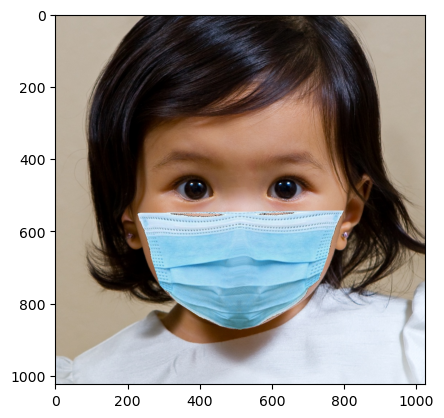

In [69]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [70]:
final_image = cv2.resize(frame, (224,224))
final_image = np.expand_dims(final_image,axis = 0)
final_iamge = final_image/255.0

In [71]:
Predictions = new_model.predict(final_image)

1/1 [==============================] - 0s 41ms/step


In [72]:
Predictions

array([[5.681551e-07]], dtype=float32)

In [39]:
#checking Unknown Images

In [73]:
frame = cv2.imread("0_bLR0SS64CuGIFPbD.jpg")

In [74]:
frame.shape

(700, 700, 3)

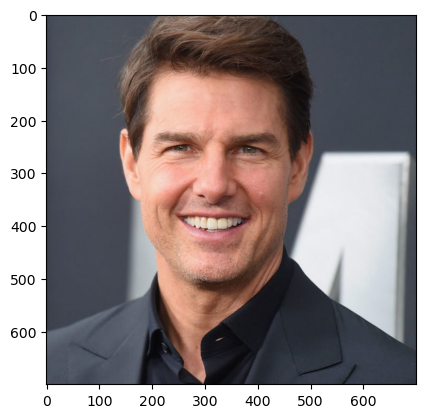

In [75]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [76]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [77]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

In [78]:
gray.shape

(700, 700)

In [79]:
faces = faceCascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = frame[y:y+h, x:x+w]
    cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
    facess = faceCascade.detectMultiScale(roi_gray)
    if len(facess) == 0:
        print["NO FACE DETECTED"]
    else:
        for (ex,ey,ew,eh) in facess:
            face_roi = roi_color[ey: ey+eh, ex:ex + ew]

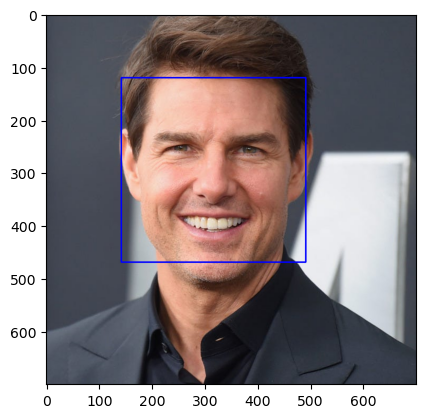

In [80]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [81]:
final_image = cv2.resize(frame, (224,224))
final_image = np.expand_dims(final_image,axis = 0)
final_iamge = final_image/255.0

In [82]:
Predictions = new_model.predict(final_image)

1/1 [==============================] - 0s 42ms/step


In [83]:
Predictions

array([[0.7842995]], dtype=float32)

In [84]:
##FACE MASK DETECTION  LIVE

In [ ]:
import cv2
import numpy as np

imp = np.zeros((500, 500))

font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN
rectangle_bgr = (255, 255, 255)
text = "Some Text in Box!"

(text_width, text_height) = cv2.getTextSize(text, font, fontScale=font_scale, thickness=1)[0]
text_offset_x = 10
text_offset_y = imp.shape[0] - 25

box_coords = ((text_offset_x, text_offset_y), (text_offset_x + text_width + 2, text_offset_y - text_height - 2))
cv2.rectangle(imp, box_coords[0], box_coords[1], rectangle_bgr, cv2.FILLED)
cv2.putText(imp, text, (text_offset_x, text_offset_y), font, fontScale=font_scale, color=(0, 0, 0), thickness=1)

cap = cv2.VideoCapture(1)

if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Can't Open WebCam")

while True:
    ret, frame = cap.read()
    
    if not ret:
        break
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    
    faces = faceCascade.detectMultiScale(gray, 1.1, 4)
    
    if len(faces) == 0:
        cv2.putText(frame, "NO FACE DETECTED", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
    else:
        cv2.putText(frame, "FACE DETECT", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
        
        for x, y, w, h in faces:
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = frame[y:y+h, x:x+w]
            
            Predictions = np.array([0.1, 0.9])
            mask_prediction, no_mask_prediction = Predictions
            
            if no_mask_prediction > mask_prediction:
                status = "FACE"
                color = (0, 255, 0)
                cv2.rectangle(frame, (x, y), (x+w, y+h), color, 2)
                
            text_x, text_y = x, y - 10
            (text_width, text_height) = cv2.getTextSize(status, font, fontScale=0.7, thickness=2)[0]
            box_coords = ((text_x, text_y - text_height - 10), (text_x + text_width + 10, text_y))
            
            cv2.rectangle(frame, box_coords[0], box_coords[1], color, cv2.FILLED)
            cv2.putText(frame, status, (text_x + 5, text_y - 5), font, 0.7, (255, 255, 255), 2)
    
    cv2.imshow("Face Recognition System", frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
